__Ejercicio 1:__. Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.
* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

In [1]:
function eulerMethod(f,alfa,h,k)
    T = []
    W = []
    t=0
    w = alfa
    j=(8/h)+1
    while t<=8
        push!(T,t)
        push!(W,w)
        s=f(k,w)
        w = w + h*s
        t=t+h
    end  
    xs = linspace(0.0,8.0,j)
ys = map(x -> alfa*exp(-2.5*x), xs)
    plot(xs,ys,color="red")
    scatter(T,W,color="green")
end

eulerMethod (generic function with 1 method)

In [2]:
function h(k,w)
    return -k*w
end

h (generic function with 1 method)

In [3]:
using PyPlot

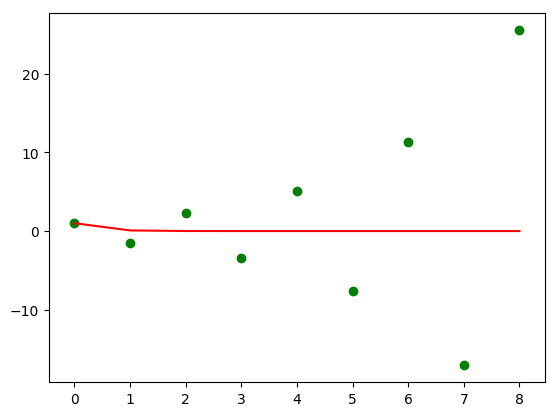

PyObject <matplotlib.collections.PathCollection object at 0x7fb0b7fbe1d0>

In [4]:
eulerMethod(h,1,1,2.5)

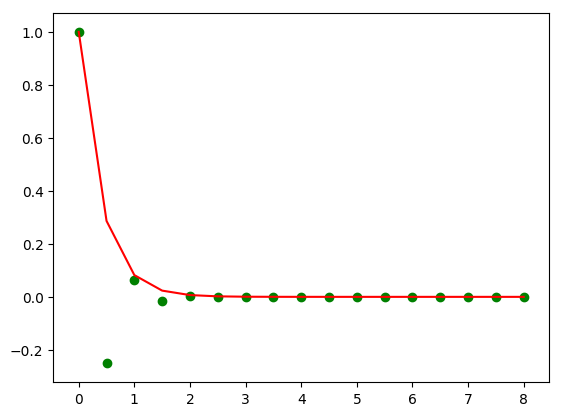

PyObject <matplotlib.collections.PathCollection object at 0x7fb0b7c51410>

In [5]:
eulerMethod(h,1,0.5,2.5)

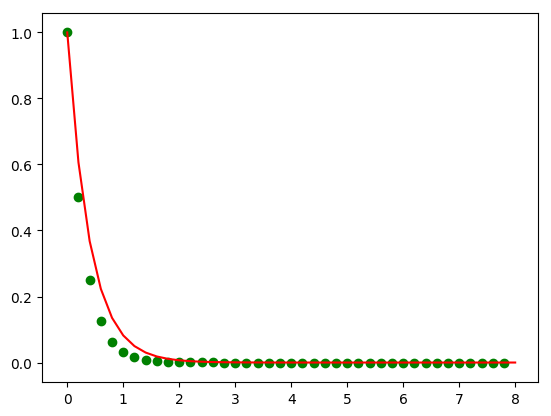

PyObject <matplotlib.collections.PathCollection object at 0x7fb0b7ba0a10>

In [6]:
eulerMethod(h,1,0.2,2.5)

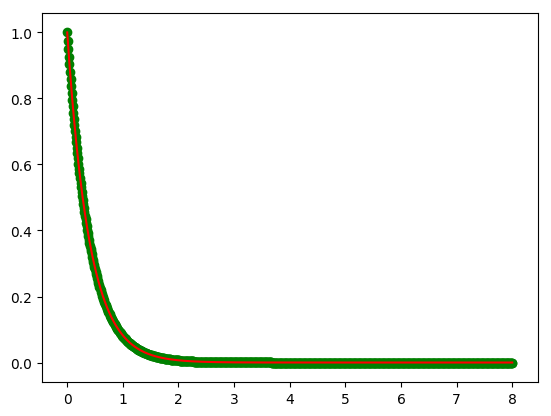

PyObject <matplotlib.collections.PathCollection object at 0x7fb0b7af6050>

In [7]:
eulerMethod(h,1,0.01,2.5)

__Ejercicio 2:__. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.


A simple vista, uno podría pensar que para resolver este
sistema uno debe desarrollar otro método para encontrar la
solución a la ecuación diferencial del ejercicio pasado. Sin
embargo, esto no es necesario.

__Respuesta__ El sistema de los resortes; la solución es:
$\ddot{x}+kx=0$

Solucionándolo como un sistema de ecuaciones de segundo grado y considerando $w=\sqrt{k}$:

$x=Ce^{wit}+Ae^{-wit}=(A+C)cos(wt)$

Derivando:

$\dot{x}=-w(A+C)sen(wt)$

$\ddot{x}=-w^2(A+C)cos(wt)=-k(A+C)cos(wt)=-kx$

Para las condiciones iniciales, $x(0)=\alpha=A+C$ y para toda $x'(0)=0$ porque sen(0)=0.

__Ejercicio 3:__. Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?

Si llevaste a cabo el ejercicio anterior, te darás cuenta
que terminas con un sistema acoplado de ecuaciones
diferenciales:

$$
\dot{u} = -kx, \dot{x} = u,
$$


__Respuesta__ Sea  $u = \dot{x}(t)$  entonces $\dot{u}=\ddot{x}(t)=-kx$

Con este sistema acoplado puedes utilizar el método de
Euler en su forma vectorial:
$$\frac{d\vec x}{dt}=\vec f(\vec x,t),$$
donde $\vec x=(x,u)$, y para este caso es facil ver que $\vec f(\vec x,t)=(u,-kx).$

__Ejercicio 4:__. Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.


In [25]:
function eulervectorial(x0,t0,k,h,N)
    X=[]
    A=[]
    T=[]
    x=x0 #el valor inicial de x
    t=t0 #el valor inicial de t
    w=sqrt(k) #esto es para acomodarlo a mi resultado de arriba
    a=-(w*sin(w*t0)) #esto es para mi primer u ya que los vectores tienen forma (x,u)
    for i in 1:N
        push!(X,x) #Como lo voy a hacer por parte voy a ir sumando sus componentes
        push!(T,t)
        push!(A,a) 
        u=-(w*sin(w*t)) #la componente en x de la derivada es u
        x=x+(h*u) #entonces siguiendo al euler anterior
        a=a-(h*(k*cos(w*t))) #y para este lo mismo.
        t=t+h
    end
    
    #scatter(T,X,color="blue") #grafica de X respecto a T donde X es la componente x de los pares ordenados y es mi solución
    #scatter(T,A,color="pink") #grafica de A respecto a T donde A es la componente y de los pares ordenados
    #plot(X,A,color="silver") #por def me tendria que arrojar esto ya que x vector=(x,u) este es el conjunto de pares ordenados solución
end

eulervectorial (generic function with 2 methods)

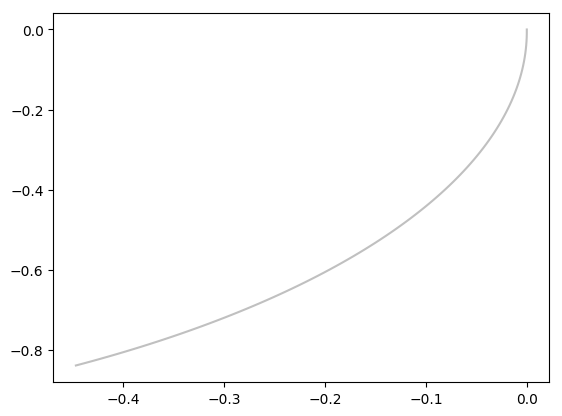

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb0b3d65550>

In [22]:
eulervectorial(0,0,1,0.01,100)

__Ejercicio 5:__ Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

In [36]:
function eulervectorial5(x0,t0,h,N)
    X=[]
    T=[]
    A=[]
    R=[]
    x=x0 #el valor inicial de x
    t=t0 #el valor inicial de t 
    for i in 1:N
        push!(X,x) #Como lo voy a hacer por parte voy a ir sumando sus componentes
        push!(T,t)
        real=4+(8*t)-5*(t^2)
        push!(R,real)
        a=((2*x)-(18*t))/(1+t) #esto es para mi primer u ya que los vectores tienen forma (x,u)
        push!(A,a)
        x=x+(h*a) #entonces siguiendo al euler anterior
        b=(-((2*x)+18))/((1+t)^2)
        a=a+(h*b) #y para este lo mismo.
        t=t+h
    end
    
    scatter(T,X,color="blue") #grafica de X respecto a T donde X es la componente x de los pares ordenados que es mi aproximacion
    plot(T,R,color="gold")
end

eulervectorial5 (generic function with 2 methods)

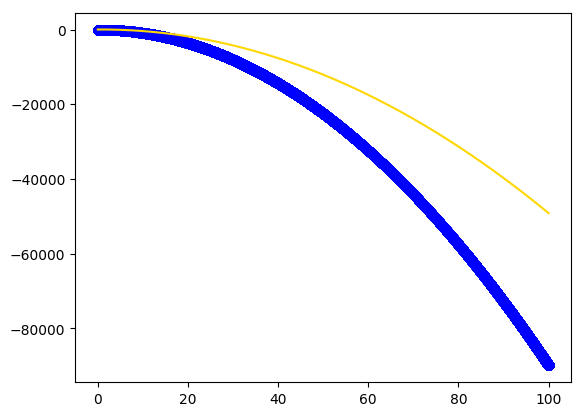

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb0af965850>

In [38]:
eulervectorial5(0,0,0.0001,1000000)